<a href="https://colab.research.google.com/github/Ivonne-Rojas/Simulation-of-Different-Age-Distributions-for-the-Analysis-of-the-Aging-Curve-of-a-Population-of-S./blob/main/Synchronous_exponential_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import collections as coll 
import random
import openpyxl
from openpyxl import load_workbook
from time import time
from timeit import timeit

In [ ]:
tiempo_inicial = time()# libreria para calcular el tiempo de ejecucion  
#-------------------------------------------------------------------------------
#variables 
s=[]#para guardar los tiempos aleatorios de replicacion
R=0
celulas=[]
zi=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]# 
t=0 # tiempo que ha pasado  
tr=[]#lista para guardar t (tiempo total )
m=15 # si se muere en uno menos del numero  
muertes=0# variable para contabilizar el numero de celulas muertas y no viables 
fraccion=[]
suma=[]# lista para guardar el numero total de celulas o la suma de la matriz 
r=0 # crecimiento per capita
#------------------------------------------------------------------------------- 
#primer for que hace los nacimientos y corre los numeros 
for j in range(6):# numero de iteraciones o numero de generaciones la cual se va realizar 
  zf=np.zeros(m,dtype=np.int64) # tiene que tener una longitud definida la cual sera la generacion en la que se mueran las celulas
  for i in range(m-1): # numero menor al numero de generaciones 
    zf[i+1]= zi[i]
    zf[0]=sum(zi)-zi[-1]
  zi=zf
#-------------------------------------------------------------------------------
#asincronico 
  #s=[]#para guardar los tiempos aleatorios de replicacion
  #for k in range(zi[0]):
    #R=random.choice(l)
    #s.append(R) 
#-------------------------------------------------------------------------------
#sincronico 
  R=R+120
  s.append(R)
  celulas.append(sum(zi)) 
#-------------------------------------------------------------------------------
  t=t+max(s)    # tiempo total que se ha demorado las celulas en cada iteracion 
  tr.append(t)
#-------------------------------------------------------------------------------
#calculos 
  muertes=muertes+zf[-1]#para guardas las celulas muertas
  total_celulas= sum(zi)+muertes #total de celulas teniendo en cuenta las muertes para sacar la fraccion de celulas viables 
  fraccion_viables= (sum(zi)-zi[-1])/total_celulas
  fraccion.append(fraccion_viables)
  r=zi[0]-muertes # numero de nacimientos menos numero de muertes 
#-------------------------------------------------------------------------------
  total=sum(zi)#numero total de celulas viables
  suma.append(total)
#-------------------------------------------------------------------------------
  print(zi)
  #print('s',s)
  #print('tiempo',t)
  #print('lista tiempo',tr)
  print('No viable', muertes)
  #print('Crecimiento per capita', r)
  #print('total de celulas vivas', total)
  #print('total celulas',total_celulas)
  #print('fraccion',fraccion_viables)
  #print(fraccion)
  print('---------------')
#-------------------------------------------------------------------------------
print(len(zi))
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
#print('tiempo de ejecucion',tiempo_ejecucion)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[2 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[4 2 1 1 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[8 4 2 1 1 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[16  8  4  2  1  1  0  0  0  0  0  0  0  0  0]
No viable 0
---------------
[32 16  8  4  2  1  1  0  0  0  0  0  0  0  0]
No viable 0
---------------
15


In [ ]:
a=zi.tolist()
print('Number of cells',a)

Number of cells [32, 16, 8, 4, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]


**Distribucion de edades** 

In [ ]:
print(sum(zi))
print(suma)

64
[2, 4, 8, 16, 32, 64]


In [ ]:
edad=[]#edades
ind=-1
for i in range(len(zi)):
  ind=ind+1
  edad.append(ind)
print('Age',edad)

Age [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


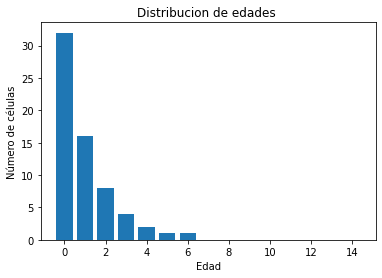

In [ ]:
fig, ax = plt.subplots()
ax.set_ylabel('Número de células')
ax.set_xlabel('Edad')
ax.set_title('Distribucion de edades ')
plt.bar(edad, zi)
#plt.savefig('barras_simple.png')
plt.show()

Curva de crecimeinto asincronico

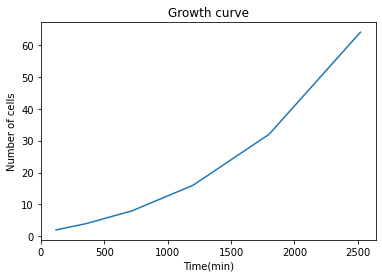

In [ ]:
plt.plot(tr,suma) # 
plt.xlabel('Time(min)')
plt.ylabel('Number of cells')
plt.title('Growth curve')
plt.show() #mostar el grafico 

Curva de crecimeinto sincronico 

In [ ]:
print(len(s), len(celulas))

6 6


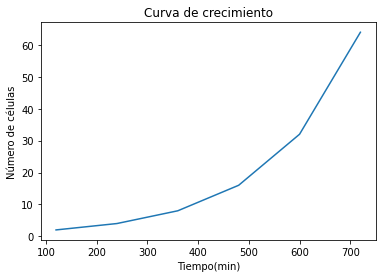

In [ ]:
plt.plot(s,celulas) # 
plt.xlabel('Tiempo(min)')
plt.ylabel('Número de células')
plt.title('Curva de crecimiento')
plt.show() #mostar el grafico 

tasa de crecimiento 

In [ ]:
pendientes=[]
for i in range(len(suma)-1):
  y=np.log(celulas[i+1])-np.log(celulas[i])
  x=s[i+1]-s[i]
  pendiente=y/x
  pendientes.append(pendiente)
print(pendientes)
print(len(pendientes))
print(sum(pendientes)/len(pendientes))

[0.0057762265046662105, 0.00577622650466621, 0.005776226504666211, 0.005776226504666211, 0.005776226504666208]
5
0.00577622650466621


contra generaciones

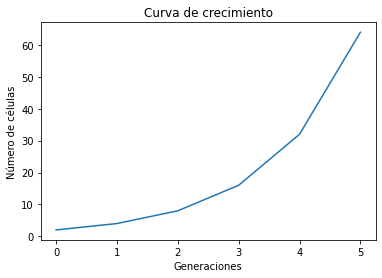

In [ ]:
plt.plot(suma) # 
plt.xlabel('Generaciones')
plt.ylabel('Número de células')
plt.title('Curva de crecimiento')
plt.show() #mostar el grafico 

tasa de crecimiento

In [ ]:
gen=[]
g=0
for i in range(len(suma)):
  g=g+1
  gen.append(g)

In [ ]:
pendientes=[]
for i in range(len(suma)-1):
  y=np.log(suma[i+1])-np.log(suma[i])
  x=gen[i+1]-gen[i]
  pendiente=y/x
  pendientes.append(pendiente)
print(pendientes)
print(len(pendientes))
print(sum(pendientes)/len(pendientes))

[0.6931471805599453, 0.6931471805599452, 0.6931471805599454, 0.6931471805599454, 0.693147180559945]
5
0.6931471805599452


Probabilidad

In [ ]:
P=[] # me guarda las probabilidades de cada edad de la distribucion 
for i in zi:
  p=i/total_celulas # se tiene en cuentas las celulas que ya se murieron 
  P.append(p)
print(P)

[0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.015625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


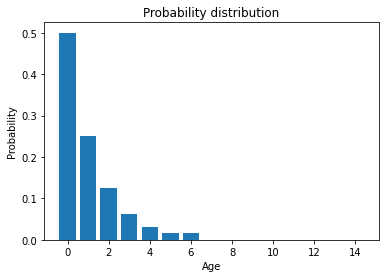

In [ ]:
fig, ax = plt.subplots() # coloca los letreros  
ax.set_ylabel('Probability')
ax.set_xlabel('Age')
ax.set_title('Probability distribution')
plt.bar(edad, P)
#plt.savefig('barras_simple.png')
plt.show()